In [1]:
print(1)

1


**This is a text cell**

# Step 1: Prepare dataset

In [4]:
import numpy as np # to help with numbers
import matplotlib.pyplot as plt # to help with visualizations

In [5]:
# sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [1, 3], [2, 4]])
print(X)

[[1 2]
 [2 3]
 [3 4]
 [4 5]
 [1 3]
 [2 4]]


In [9]:
y = np.array(['Red', 'Red', 'Blue', 'Blue', 'Red', 'Blue'])
print(y)

['Red' 'Red' 'Blue' 'Blue' 'Red' 'Blue']


In [10]:
X_test = np.array([3, 3])

# Step 2: Calculate the distances

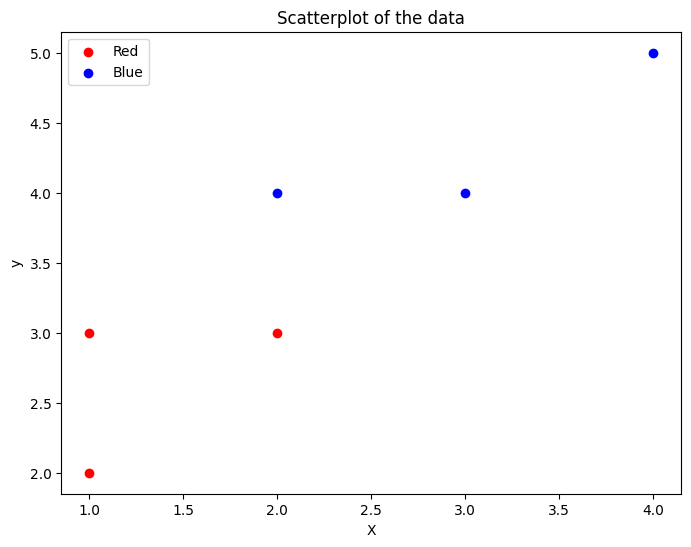

In [20]:
plt.figure(figsize=(8, 6)) # size of the graph
plt.scatter(X[y == 'Red'][:, 0], X[y == 'Red'][:, 1], color='red', label='Red')
plt.scatter(X[y == 'Blue'][:, 0], X[y == 'Blue'][:, 1], color='blue', label='Blue')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatterplot of the data')
plt.show()

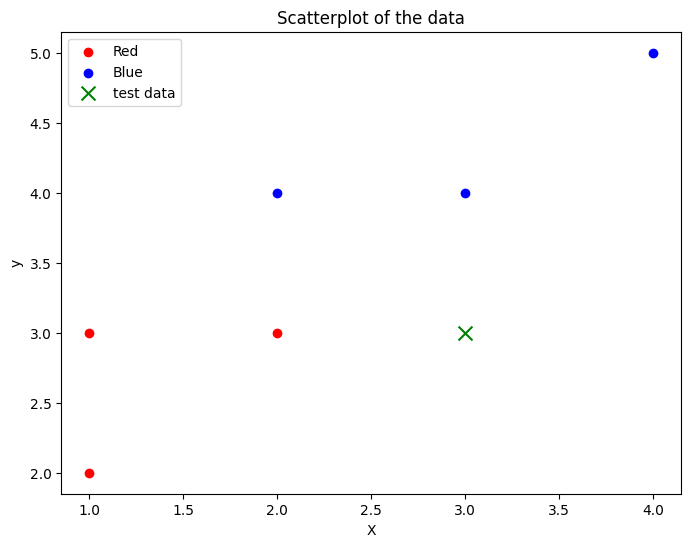

In [22]:
plt.figure(figsize=(8, 6)) # size of the graph
plt.scatter(X[y == 'Red'][:, 0], X[y == 'Red'][:, 1], color='red', label='Red')
plt.scatter(X[y == 'Blue'][:, 0], X[y == 'Blue'][:, 1], color='blue', label='Blue')
plt.scatter(X_test[0], X_test[1], color='green', marker='x', s=100, label='test data')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatterplot of the data')
plt.show()

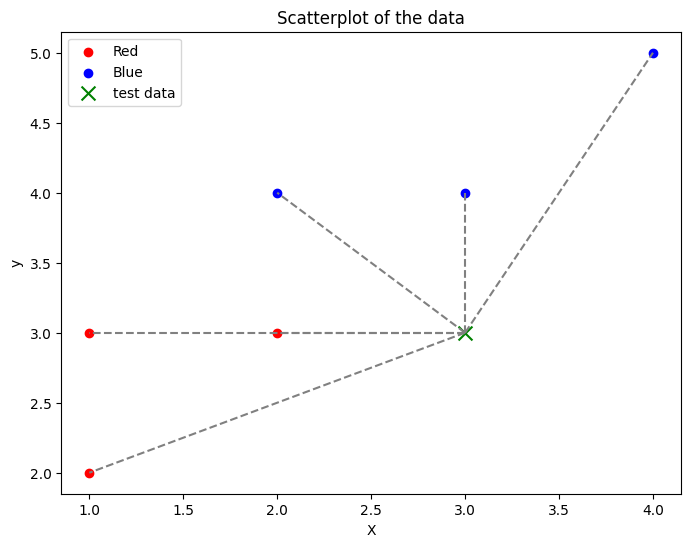

In [23]:
plt.figure(figsize=(8, 6)) # size of the graph
plt.scatter(X[y == 'Red'][:, 0], X[y == 'Red'][:, 1], color='red', label='Red')
plt.scatter(X[y == 'Blue'][:, 0], X[y == 'Blue'][:, 1], color='blue', label='Blue')
plt.scatter(X_test[0], X_test[1], color='green', marker='x', s=100, label='test data')

for i in X:
  distance = np.linalg.norm(X_test - i)
  plt.plot([X_test[0], i[0]], [X_test[1], i[1]], color='gray', linestyle='--')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatterplot of the data')
plt.show()

Step 3: Find the nearest neighbors

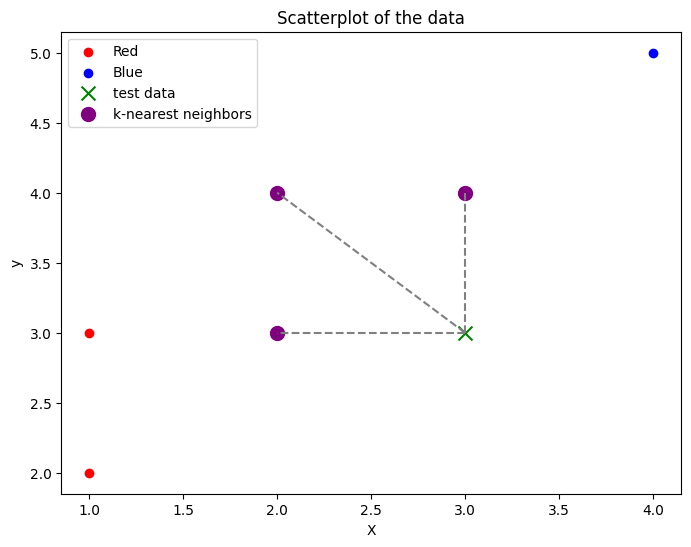

In [27]:
distances = [] #create an empty list

# we loop through all training to calculate the distance from the test data.
# and append or add the distance to the distances list
for i in X:
  dist = np.linalg.norm(X_test - i)
  distances.append(dist)

# select the K nearest neighbors
k = 3
k_nearest = np.argsort(distances)[:k]

plt.figure(figsize=(8, 6)) # size of the graph
plt.scatter(X[y == 'Red'][:, 0], X[y == 'Red'][:, 1], color='red', label='Red')
plt.scatter(X[y == 'Blue'][:, 0], X[y == 'Blue'][:, 1], color='blue', label='Blue')
plt.scatter(X_test[0], X_test[1], color='green', marker='x', s=100, label='test data')
plt.scatter(X[k_nearest][:, 0], X[k_nearest][:, 1], color = 'purple', marker='o', s=100, label='k-nearest neighbors')

for i in k_nearest:
  plt.plot([X_test[0], X[i, 0]], [X_test[1], X[i, 1]], color='gray', linestyle='--')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatterplot of the data')
plt.show()

# Step 4: Find the majority class in the neighbors

In [29]:
from collections import Counter

# Get the labels from the k neighbors
neighbor_labels = y[k_nearest]

# Count the occurences of each class label
label_count = Counter(neighbor_labels)

# select the class label with the highest count
predicted_class = label_count.most_common(1)[0][0]

print(predicted_class)

Blue
